## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
# Setting the header row to 0 allows us to substitute our own column names.
df = pd.read_csv('QueryResults_new.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2024-02-01 00:00:00  assembly    149
1  2024-02-01 00:00:00         c    807
2  2024-02-01 00:00:00        c#   2983
3  2024-02-01 00:00:00       c++   1705
4  2024-02-01 00:00:00    delphi    119
                     DATE     TAG  POSTS
2588  2008-08-01 00:00:00    perl     28
2589  2008-08-01 00:00:00     php    157
2590  2008-08-01 00:00:00  python    119
2591  2008-08-01 00:00:00    ruby     70
2592  2008-07-01 00:00:00      c#      3


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2593, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
#  Note that .count() will actually tell us the number of non-NaN values in each column.
df.count()

DATE     2593
TAG      2593
POSTS    2593
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TAG').sum()

<ipython-input-43-e0b10c91de87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum()


,POSTS
TAG,
assembly,44059
c,403132
c#,1612474
c++,805242
delphi,51751
go,72450
java,1914591
javascript,2524443
perl,68054


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,187,187
c,187,187
c#,188,188
c++,187,187
delphi,187,187
go,172,172
java,187,187
javascript,187,187
perl,187,187


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
type(df['DATE'][1])
# df.DATE[1] # Both notations work

str

In [ ]:
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1]))

2024-02-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Convert entire column
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2024-02-01,assembly,149
1,2024-02-01,c,807
2,2024-02-01,c#,2983
3,2024-02-01,c++,1705
4,2024-02-01,delphi,119


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS').fillna(0)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(188, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,606.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
reshaped_df.count()

TAG
assembly      188
c             188
c#            188
c++           188
delphi        188
go            188
java          188
javascript    188
perl          188
php           188
python        188
r             188
ruby          188
swift         188
dtype: int64

In [ ]:
# Check if there are any NaN values left in the entire DataFrame:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

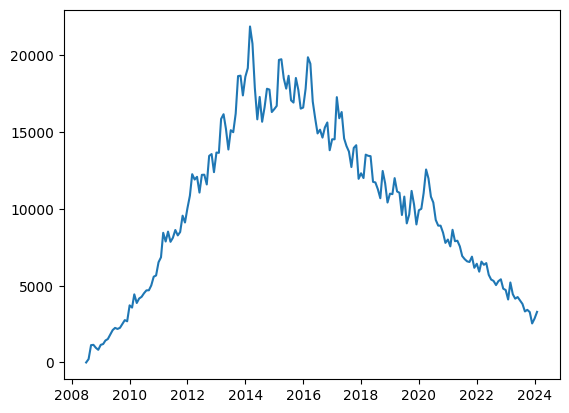

In [ ]:
x = reshaped_df.index
y = reshaped_df['java']
plt.plot(x,y)

Plot methods:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound

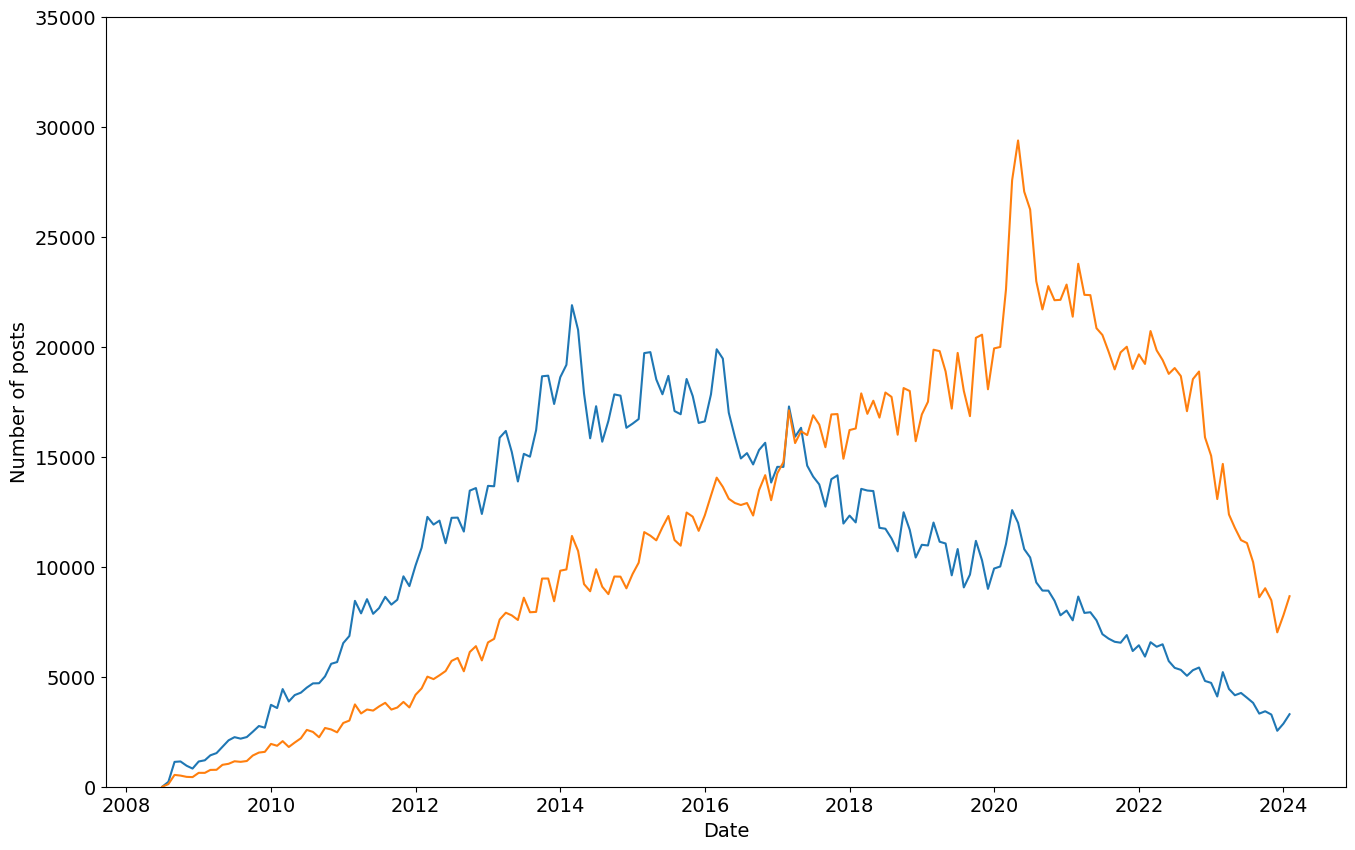

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

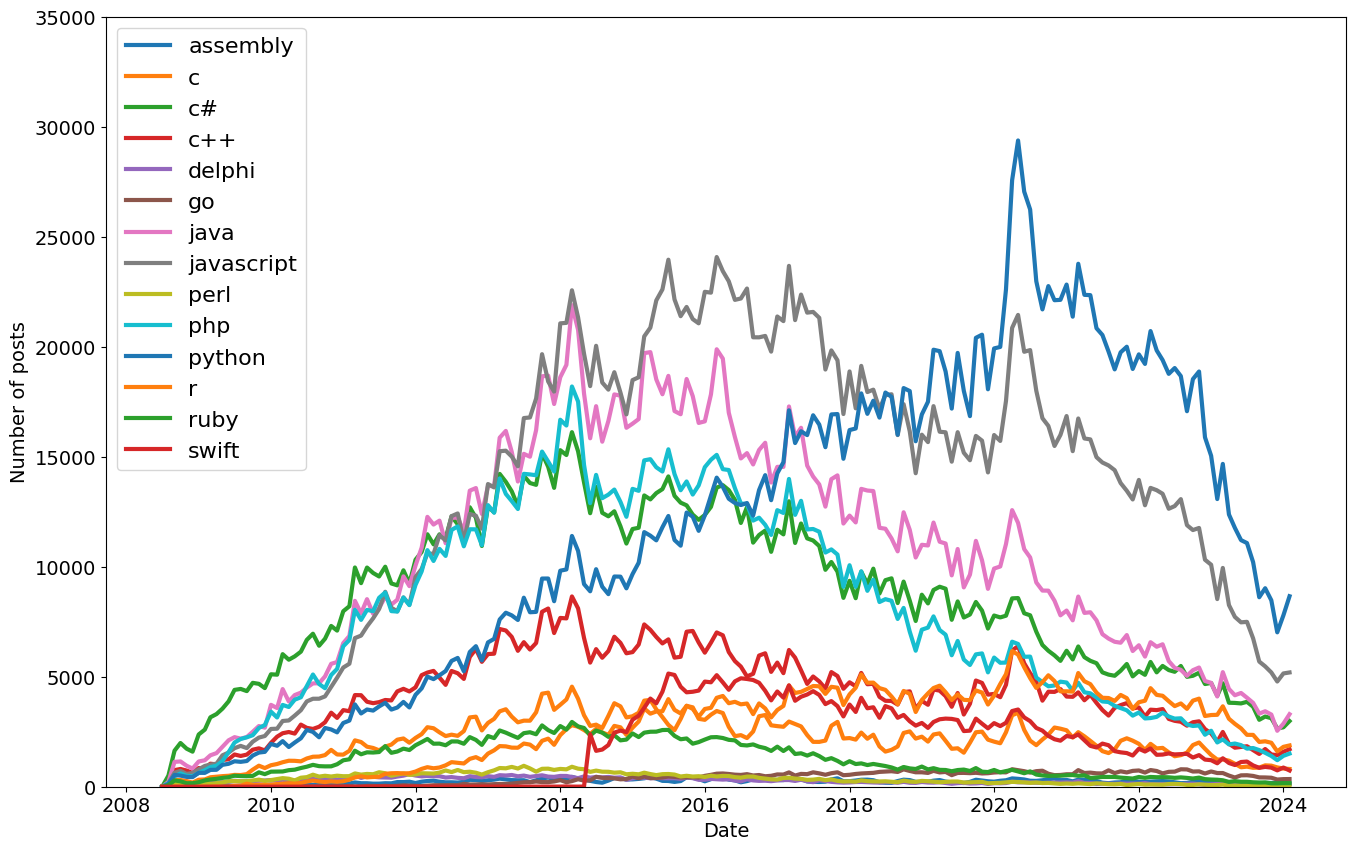

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column],
  linewidth=3, label=reshaped_df[column].name
  )

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [ ]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

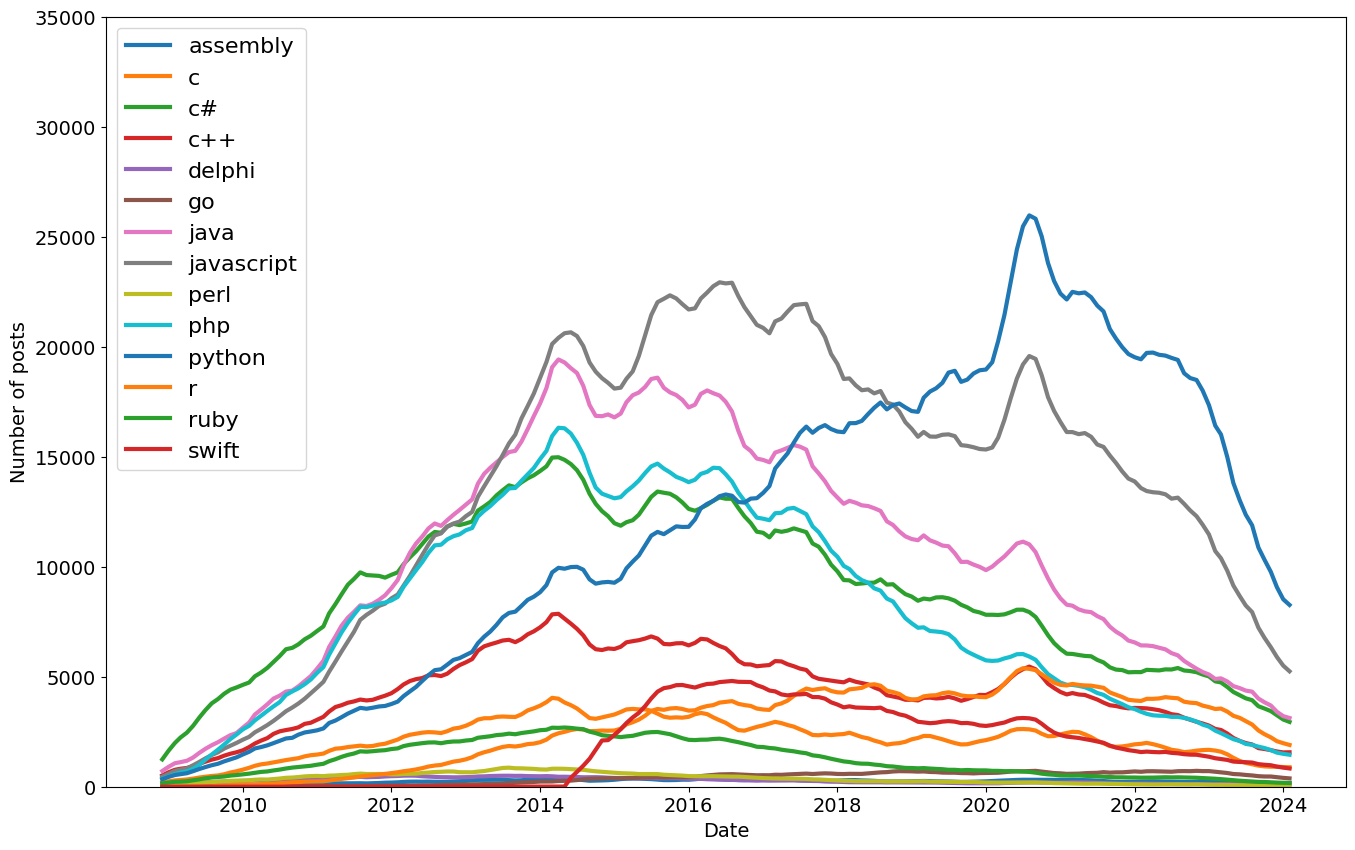

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
  linewidth=3, label=roll_df[column].name
  )

plt.legend(fontsize=16)